# Unsupervised Learning

**Ejemplos:** (Cuando no hay etiquetas)

+ Segmentación de clientes
+ Segmentación de productos
+ One-person segment (lo que funciona bien en un grupo no funciona necesariamente en otro)
+ Agrupación según características

**Escenario**

Cada elemento (usuario, cliente, producto..) puede ser considerado un vector. Dado un paquete de vectores se distribuyen por clusters. Vectores similares estarán en el mismo cluster, y clusters similares estarán más 'cerca' entre si que los que son más diferentes.

Todo éste proceder asume la existencia de una métrica de distancia, así se puede medir dicha distancia entre vectores dentro del espacio vectorial.

**Pasos para aplicar USL:**

+ **1**: Representación vectorial
+ **2**: Métrica, función de distancia
+ **3**: Medida de similitud

Cuando se crea un cluster, el vector en el centro del cluster (centroide) se considera el prototipo o el más representativo del cluster.


**Problemas tratables por USL:**

+ Segmentación de mercado
+ Detección de fraude en seguros o banca
+ Respuesta a tratamientos médicos
+ Detección de outliers

**Ejemplos de modelos:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

# K-Means


El más viejo y el más popular. La idea es seleccionar previamente cuantos clusters se desean ($k$). Se seleccionan los puntos centrales del cluster (centroides) de manera aleatoria. Para cada nuevo registro se reasigna un cluster y se recalcula el centroide (media). Se itera el proceso hasta que no haya cambio en la clusterización.

![](data/kmeans.png)

![](data/kmeans2.png)

In [1]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, true_labels = make_blobs(n_samples = 300, centers =3, cluster_std= 2.75, random_state=42)

In [3]:
features

array([[-8.14286966e+00, -9.21718161e+00],
       [-9.24576395e+00, -7.93763734e+00],
       [-2.47199115e-01,  5.65696609e+00],
       [ 4.04125553e+00,  4.99480603e+00],
       [-1.24844697e+01, -9.65234695e+00],
       [ 6.99844280e+00,  1.53333873e+00],
       [-2.03295008e+00,  1.00739089e+01],
       [ 5.77544034e+00,  4.22927164e-01],
       [-3.82692678e+00,  8.50372394e+00],
       [-5.78528224e+00,  1.08198086e+01],
       [-4.16389081e+00,  1.41080511e+01],
       [ 5.62167142e+00,  6.76682970e-02],
       [-1.93482274e+00,  3.62519329e+00],
       [-6.40146716e+00,  7.85751149e+00],
       [-8.66889426e+00, -8.21970440e+00],
       [-4.43984363e+00,  8.11321523e+00],
       [-1.13553689e+01, -6.74787599e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-2.24223436e+00,  1.16780599e+01],
       [-8.95340615e-01,  1.50380391e+01],
       [ 6.76940219e-01,  6.75740975e+00],
       [-2.95273333e+00,  1.01254260e+01],
       [ 7.32145810e+00,  1.56876188e+00],
       [-7.

array([-1.16966133, -1.47111779])

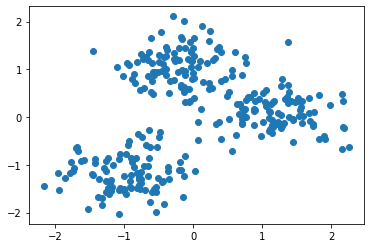

In [13]:
plt.scatter(scaled_f[:,0],scaled_f[:,1])

In [5]:
scaler = StandardScaler()
scaled_f = scaler.fit_transform(features)
scaled_f

array([[-1.16966133e+00, -1.47111779e+00],
       [-1.36689329e+00, -1.29273268e+00],
       [ 2.42331249e-01,  6.02531821e-01],
       [ 1.00924092e+00,  5.10218097e-01],
       [-1.94607506e+00, -1.53178549e+00],
       [ 1.53807840e+00,  2.76445444e-02],
       [-7.70168154e-02,  1.21831109e+00],
       [ 1.31936735e+00, -1.27161267e-01],
       [-3.97835899e-01,  9.99406883e-01],
       [-7.48051041e-01,  1.32229919e+00],
       [-4.58095595e-01,  1.78072297e+00],
       [ 1.29186866e+00, -1.76688972e-01],
       [-5.94685812e-02,  3.19276272e-01],
       [-8.58244157e-01,  9.09316464e-01],
       [-1.26373096e+00, -1.33205649e+00],
       [-5.07444582e-01,  9.44964890e-01],
       [-1.74415656e+00, -1.12686447e+00],
       [ 1.20356867e-01,  1.60446628e-01],
       [-1.14443384e-01,  1.44195059e+00],
       [ 1.26423299e-01,  1.91037539e+00],
       [ 4.07596235e-01,  7.55947977e-01],
       [-2.41502798e-01,  1.22549324e+00],
       [ 1.59584363e+00,  3.25829933e-02],
       [-9.

In [27]:
kmeans = KMeans(init = 'random',
               n_clusters = 3,
               n_init = 10,
               max_iter = 300,
               random_state = 42)


In [28]:
kmeans.fit(scaled_f)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[-0.95632267, -1.18100061],
       [-0.21553783,  1.07066401],
       [ 1.20017474,  0.09073808]])

In [30]:
kmeans.labels_

array([0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0])

In [31]:
import numpy

In [32]:
import seaborn as sns

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


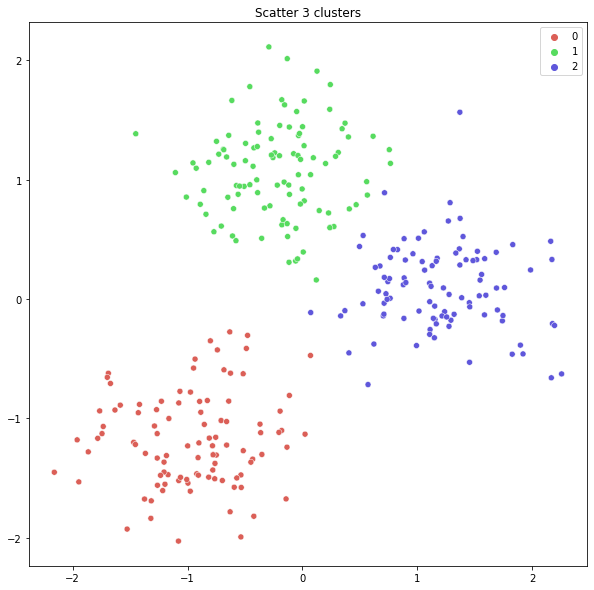

In [34]:
plt.figure(figsize= (10,10))
sns.scatterplot(scaled_f[:,0],scaled_f[:,1], hue = kmeans.labels_, palette=sns.color_palette('hls',3))
plt.title('Scatter 3 clusters')
plt.show();

In [18]:
kmeans.predict([[-1.14443384e-01,  1.44195059e+00]])

array([1])

In [35]:
kmeans.inertia_

105.43712315800344

# Hierarchical Clustering (Dendrograma)

La mejora sobre K-Means es fundamentalmente que no hay que asumir el número de clusters.

Hay dos maneras de atacar éste problema:

+ Por aglomeración
+ Por división

**Aglomeración:**

Se empieza asumiendo que cada registro es un cluster individual y se van combinando aquellos similares hasta conseguir un solo cluster, la población entera. Después se decide el número óptimo de clusters según la distancia.


**División:**

El proceso inverso. Se comienza con un solo cluster y se va dividiendo hasta tener el número óptimo de clusters (según distancia).



![](data/hca.png)

##### Medidas de distancia

Aquí también entra la distancia, para medir entre registros/clusters. Normalmente, se usa la distancia euclídea. El uso de la métrica de distancia depende del problema en cuestión, por ejemplo, en una clusterización de lugares en la ciudad, podría ser mejor usar $cityblock$, o incluso tomar el tiempo que hay entre dos lugares (tiempo como métrica de distancia).

##### Criterios de conexión (linkage criteria)

Después de seleccionar la métrica de distancia, hay que decidir de qué manera se conectan los registros al cluster. Puede ser:

+ Single-linkage: conexión entre los puntos más parecidos del cluster.
+ Complete-linkage: conexión entre los puntos menos parecidos del cluster.
+ Average-linkage: conexión entre los centroides del cluster.


![](data/link.png)

Al igual que la métrica de distancia, la elección del criterio de conexión ha de basarse en el propio problema. Por ejemplo, para clasificar varias tecnologías diferentes tendría sentido basarse en cuales son más parecidos. Si no existen justificaciones claras de cual usar, se suele usar el criterio de Ward, que viene a ser mínimos cuadrados de las distancias, respecto de la media del cluster. Esto concuerda con el concepto de distancia entre grupos en estadística (ANOVA, MANOVA....)

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

In [37]:
import numpy as np

In [39]:
#Datos Sinteticos

np.set_printoptions(precision = 5, suppress = True )

np.random.seed(2453)

a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])


In [43]:
b

array([[-0.70301, 21.27917],
       [ 3.0048 , 22.20668],
       [ 3.03531, 17.47778],
       [-3.53217, 21.65185],
       [ 0.21286, 18.61586],
       [ 1.99027, 20.77436],
       [-0.70238, 19.41284],
       [-2.23129, 17.4253 ],
       [ 0.55333, 18.45491],
       [-1.26678, 20.5818 ],
       [ 1.22512, 20.6128 ],
       [-2.95219, 21.92504],
       [ 1.39689, 21.18277],
       [ 1.50512, 19.75955],
       [ 2.86697, 19.52229],
       [-0.14282, 22.3043 ],
       [ 1.34539, 21.43974],
       [ 0.13788, 22.87997],
       [ 1.224  , 20.61399],
       [-2.39162, 15.63534],
       [-0.29405, 21.22844],
       [-0.2063 , 23.10706],
       [-1.53227, 17.66859],
       [-0.68856, 20.69246],
       [-2.54586, 18.61938],
       [ 2.49505, 22.32622],
       [ 0.1621 , 17.91814],
       [ 0.04025, 17.12017],
       [ 4.6714 , 21.66391],
       [-0.35779, 17.63646],
       [-3.50578, 16.78981],
       [ 1.65652, 22.21206],
       [ 1.04404, 19.16585],
       [-0.44878, 20.54243],
       [ 1.428

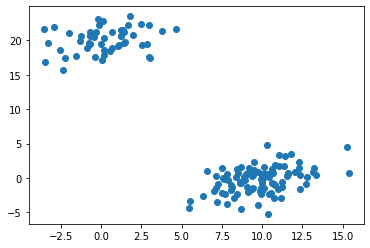

In [44]:
X = np.concatenate((a,b))

plt.scatter(X[:,0],X[:,1])
plt.show();

In [45]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(X)

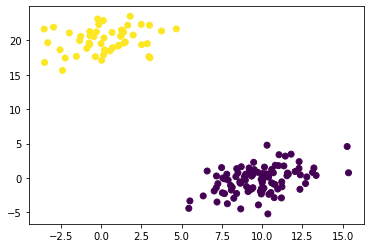

In [46]:
plt.scatter(X[:,0],X[:,1], c = clusters.labels_)
plt.show();

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [48]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [49]:
z = linkage(X, 'ward')

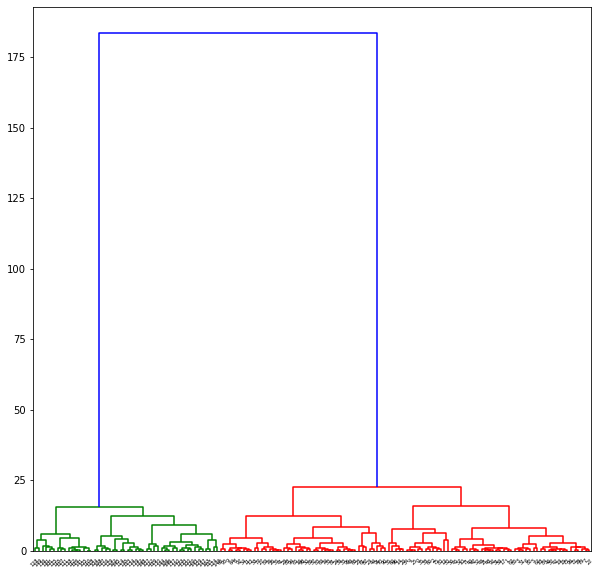

In [50]:
plt.figure(figsize=(10,10))
dendrogram(z, leaf_rotation=(45))
plt.show();

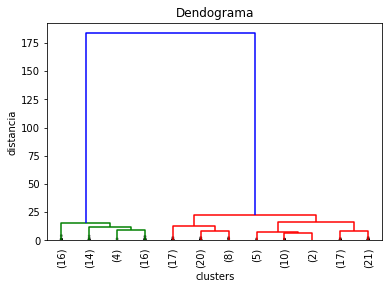

In [52]:
dendrogram(z, truncate_mode='lastp', p = 12,
          leaf_rotation= 90, leaf_font_size=10,
          show_contracted = True, show_leaf_counts = True)

plt.title('Dendograma')
plt.xlabel('clusters')
plt.ylabel('distancia')
plt.show();

In [61]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    

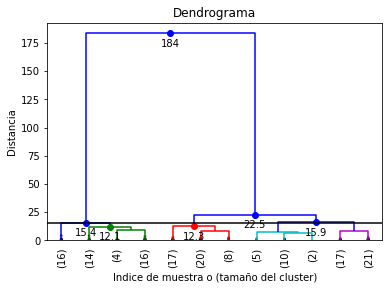

In [82]:
fancy_dendro(z, truncate_mode='lastp', p = 12,
          leaf_rotation= 90, leaf_font_size=10,
          show_contracted = True, annotate_above = 10, max_d = 15)
plt.show();

In [64]:
from scipy.cluster.hierarchy import fcluster

In [79]:
max_d = 20
clusters = fcluster(z, max_d, criterion= 'distance')

In [80]:
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:

clusters = fcluster(z, t = 15, criterion= 'distance')
clusters

array([4, 5, 4, 5, 4, 5, 5, 5, 3, 3, 5, 3, 4, 3, 4, 5, 3, 5, 5, 5, 4, 5,
       5, 3, 3, 4, 3, 3, 3, 3, 4, 5, 5, 3, 4, 4, 3, 3, 4, 3, 5, 3, 5, 5,
       3, 5, 5, 5, 5, 3, 3, 5, 5, 3, 3, 4, 5, 5, 3, 5, 4, 3, 5, 3, 3, 3,
       4, 5, 3, 3, 3, 5, 5, 5, 3, 4, 3, 3, 5, 5, 4, 3, 5, 3, 5, 3, 5, 3,
       3, 3, 3, 3, 5, 3, 3, 3, 4, 3, 3, 5, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1], dtype=int32)

In [83]:
from sklearn.datasets import make_moons

In [90]:
moons = make_moons(n_samples=100, shuffle= True, noise=0.03)[0]

In [91]:
moons

array([[ 0.00706,  0.3534 ],
       [ 1.04713,  0.03208],
       [ 1.96754,  0.26377],
       [-0.01054,  1.01896],
       [-0.14614,  0.98055],
       [-0.34345,  0.96693],
       [ 0.25107, -0.14085],
       [ 0.18128,  0.94802],
       [ 0.53418, -0.36155],
       [ 1.65561, -0.27024],
       [-0.68796,  0.74699],
       [ 1.96749,  0.35892],
       [-0.0004 ,  0.16661],
       [ 0.94933,  0.22613],
       [ 0.00453,  0.23518],
       [ 0.36578,  0.92756],
       [ 0.41187, -0.24647],
       [-0.92633,  0.28001],
       [-0.91328,  0.41991],
       [ 1.40956, -0.41018],
       [ 0.68268,  0.69107],
       [ 0.45356,  0.85238],
       [-0.09258,  1.01663],
       [ 1.87995,  0.06096],
       [ 0.66053, -0.42435],
       [-0.99069, -0.01733],
       [ 0.93828,  0.41025],
       [ 0.29547,  0.94757],
       [ 0.90555, -0.50879],
       [ 0.19335,  0.97647],
       [ 0.95018,  0.33039],
       [ 0.82885,  0.54809],
       [ 0.78498,  0.70845],
       [ 1.79199, -0.13807],
       [ 0.384

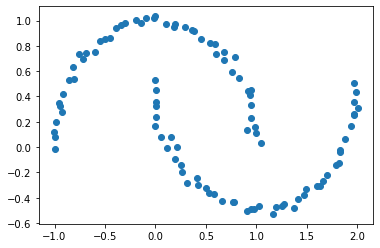

In [92]:
plt.scatter(moons[:,0], moons[:,1]);

In [93]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

In [94]:
cluster  = KMeans(n_clusters = 2).fit(moons)

In [95]:
cluster.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

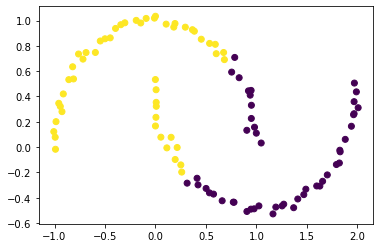

In [96]:
plt.scatter(moons[:,0], moons[:,1], c = cluster.labels_);

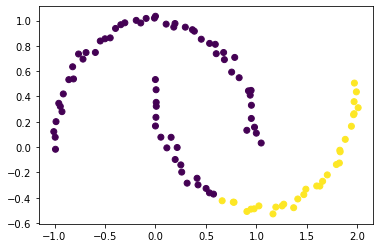

In [97]:
cluster = AC().fit(moons)
plt.scatter(moons[:,0], moons[:,1], c = cluster.labels_);

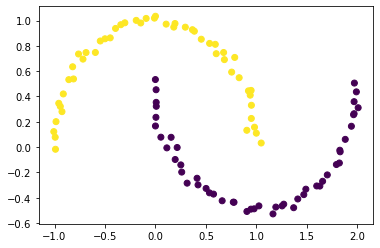

In [98]:
cluster = AC(linkage='single').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c = cluster.labels_);

In [100]:
import umap

In [101]:
from sklearn.datasets import load_digits
digits = load_digits()

In [109]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [113]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

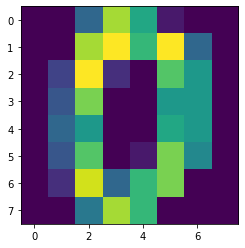

In [106]:
plt.imshow(digits.images[0])

In [112]:
digits.target[0]

0

In [114]:
reducer = umap.UMAP(random_state=12)
reducer.fit(digits.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=12, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [115]:
embedding = reducer.transform(digits.data)


In [116]:
embedding

array([[15.44774,  9.23968],
       [-6.47641,  9.50781],
       [-4.28548,  9.49898],
       ...,
       [-4.45126,  8.02588],
       [-1.38359,  4.0125 ],
       [-4.02637,  7.76606]], dtype=float32)

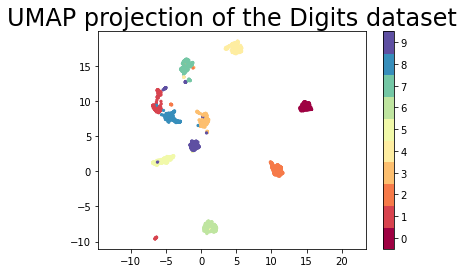

In [117]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);